## Analyzing and Clustering Localities ###

#### 1. Importing required libraries ####

In [1]:
import pandas as pd # Matplotlib and associated plotting modules

import numpy as np # library to handle data in a vectorized manner

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams


# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#### 2. Loading CSV berlin_venues_refined which was stored after fetching data using foursquare API ####

In [2]:
df = pd.read_csv(r"C:\Users\GAURI TOSHNIWAL\Documents\zcoursera\Capstone\Coursera_Capstone\final_project\berlin_venues_refined.csv")

In [3]:
df.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,(0101) Mitte,52.51769,13.402376,Lustgarten,52.518469,13.399454,Garden
1,1,(0101) Mitte,52.51769,13.402376,Marx-Engels-Forum,52.518788,13.403254,Park
2,2,(0101) Mitte,52.51769,13.402376,Central Berlin,52.519535,13.404598,Garden
3,3,(0101) Mitte,52.51769,13.402376,Berliner Dom,52.519133,13.401046,Church
4,4,(0101) Mitte,52.51769,13.402376,Kastanienwäldchen,52.518168,13.395209,Park


In [4]:
#removing Unnecessary columns
del df['Unnamed: 0']

In [5]:
df.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,(0101) Mitte,52.51769,13.402376,Lustgarten,52.518469,13.399454,Garden
1,(0101) Mitte,52.51769,13.402376,Marx-Engels-Forum,52.518788,13.403254,Park


In [6]:
df['Venue Category'].value_counts()

Park                        55
Playground                   6
Garden                       5
Café                         3
Hotel                        3
Bus Stop                     2
Parking                      2
Plaza                        2
Doctor's Office              1
Neighborhood                 1
Rock Climbing Spot           1
Sculpture Garden             1
Beer Garden                  1
Corporate Amenity            1
Church                       1
History Museum               1
Water Park                   1
Lake                         1
Multiplex                    1
Mediterranean Restaurant     1
Gym / Fitness Center         1
Palace                       1
Light Rail Station           1
Scenic Lookout               1
Shopping Mall                1
Name: Venue Category, dtype: int64

Here we can see that there are  few rows which are not either a park, playground or garden and so we create a new dataframe only with parks, playground and gardens as venue category.

In [7]:
# Creating a dataframe
berlin_parks = df.loc[(df['Venue Category'] == 'Park') | (df['Venue Category'] == 'Playground') | (df['Venue Category'] == 'Garden') ]

In [8]:
berlin_parks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 93
Data columns (total 7 columns):
Neighborhood              66 non-null object
Neighborhood Latitude     66 non-null float64
Neighborhood Longitude    66 non-null float64
Venue                     66 non-null object
Venue Latitude            66 non-null float64
Venue Longitude           66 non-null float64
Venue Category            66 non-null object
dtypes: float64(4), object(3)
memory usage: 4.1+ KB


In [9]:
#grouping the data according to neighbourhood 
park_count = berlin_parks.groupby('Neighborhood').count()

In [10]:
park_count.head(2)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
(0101) Mitte,4,4,4,4,4,4
(0102) Moabit,3,3,3,3,3,3


In [11]:
park_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, (0101) Mitte to (1210) Märkisches Viertel
Data columns (total 6 columns):
Neighborhood Latitude     40 non-null int64
Neighborhood Longitude    40 non-null int64
Venue                     40 non-null int64
Venue Latitude            40 non-null int64
Venue Longitude           40 non-null int64
Venue Category            40 non-null int64
dtypes: int64(6)
memory usage: 2.2+ KB


In [12]:
#removing all the extra columns and retriving only neighbourhood and number of parks in each neighbourhood
del park_count['Neighborhood Latitude']
del park_count['Neighborhood Longitude']
del park_count['Venue']
del park_count['Venue Latitude']
del park_count['Venue Longitude']

In [13]:
park_count.head()

,Venue Category
Neighborhood,
(0101) Mitte,4
(0102) Moabit,3
(0103) Hansaviertel,2
(0104) Tiergarten,5
(0105) Wedding,1


In [14]:
#renaming column venue category to Number of parks and playgrounds
park_count = park_count.rename(columns = {"Venue Category":"Number of parks and playground"})

In [15]:
# correcting index
park_count = park_count.reset_index()

In [16]:
park_count = park_count.rename(columns = {"Neighborhood":"Locality"})
park_count.head()

,Locality,Number of parks and playground
0,(0101) Mitte,4
1,(0102) Moabit,3
2,(0103) Hansaviertel,2
3,(0104) Tiergarten,5
4,(0105) Wedding,1


#### 3. Analyzing The Localities with respect to Parks ####

In [17]:
#Finding Out Total Number of parks present
Total = park_count['Number of parks and playground'].sum()
print (Total)

66


#### So there are 66 parks in total ####

In [18]:
park_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Locality                          40 non-null object
Number of parks and playground    40 non-null int64
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


##### So out of total 96 Localities in Berlin 40 Localities have parks and 56 Localities don't. #####

#### Plotting the Localities which have parks (Y axis having Locality name and X axis has number of parks present in that Locality)

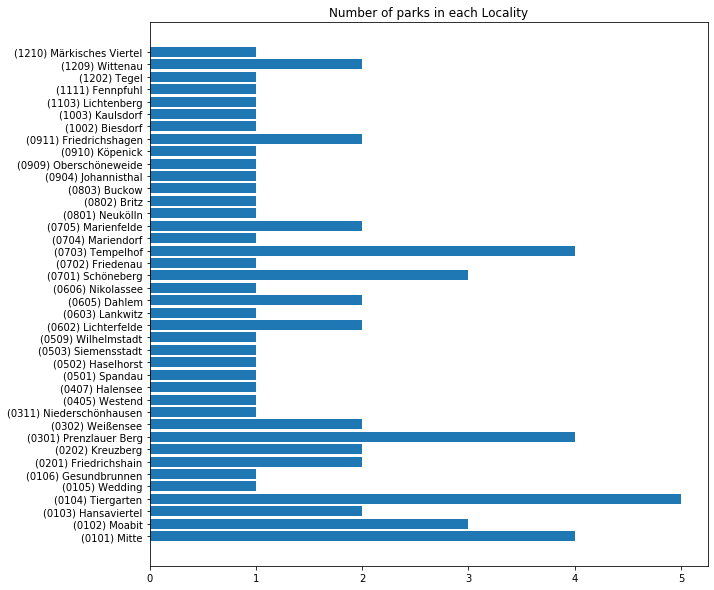

In [19]:
rcParams['figure.figsize']= 10,10
plt.barh(park_count['Locality'], park_count['Number of parks and playground'], align='center',data=park_count)
plt.title('Number of parks in each Locality')
plt.savefig(r'C:\Users\GAURI TOSHNIWAL\Documents\Berlin_one.png')
rcParams['figure.figsize']= 10,10

#### 4.Loading Berlin_localities CSV file ####

In [20]:
locality = pd.read_csv(r"C:\Users\GAURI TOSHNIWAL\Documents\zcoursera\Capstone\Coursera_Capstone\final_project\berlin_localities.csv")

In [21]:
locality.head()

,Unnamed: 0,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude
0,0,(0101) Mitte,10.70,79582,7445,52.517690,13.402376
1,1,(0102) Moabit,7.72,69425,8993,52.530102,13.342542
2,2,(0103) Hansaviertel,0.53,5889,11111,52.519123,13.341873
3,3,(0104) Tiergarten,5.17,12486,2415,52.514500,13.350100
4,4,(0105) Wedding,9.23,76363,8273,52.550123,13.341970


In [22]:
#removing unnecessary columns
del locality['Unnamed: 0']

In [23]:
#merge park_count and Locality dataframes
df_merged = pd.merge(locality,park_count,on='Locality')

In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 7 columns):
Locality                          40 non-null object
Area in km²                       40 non-null float64
Population as of 2008             40 non-null int64
Density inhabitants per km²       40 non-null int64
latitude                          40 non-null float64
longitude                         40 non-null float64
Number of parks and playground    40 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.5+ KB


In [25]:
#Creating a column which has Population to park Ratio
df_merged['Population to park ratio'] =df_merged['Density inhabitants per km²'].divide(df_merged['Number of parks and playground'])

In [26]:
#Merging columns such that it includes all localites
df_temp = pd.merge(locality,park_count,on='Locality',how='left')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 7 columns):
Locality                          96 non-null object
Area in km²                       96 non-null float64
Population as of 2008             96 non-null int64
Density inhabitants per km²       96 non-null int64
latitude                          96 non-null float64
longitude                         96 non-null float64
Number of parks and playground    40 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 6.0+ KB


In [27]:
df_temp['Number of parks and playground'].fillna(0, inplace=True)

In [28]:
df_temp.head()

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground
0,(0101) Mitte,10.70,79582,7445,52.517690,13.402376,4.0
1,(0102) Moabit,7.72,69425,8993,52.530102,13.342542,3.0
2,(0103) Hansaviertel,0.53,5889,11111,52.519123,13.341873,2.0
3,(0104) Tiergarten,5.17,12486,2415,52.514500,13.350100,5.0
4,(0105) Wedding,9.23,76363,8273,52.550123,13.341970,1.0


In [29]:
#Finding Localities which do not have parks
df_no_parks = df_temp.loc[df_temp['Number of parks and playground'] == 0]

In [30]:
df_no_parks.head()

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground
10,(0303) Blankenburg,6.03,6550,1086,51.902564,4.256157,0.0
11,(0304) Heinersdorf,3.95,6580,1666,52.572825,13.437015,0.0
12,(0305) Karow,6.65,18258,2746,52.615087,13.486276,0.0
13,(0306) Stadtrandsiedlung Malchow,5.68,1166,205,52.571019,13.463285,0.0
14,(0307) Pankow,5.66,55854,9868,52.597637,13.436374,0.0


In [31]:
#Sorting Localities with No parks on the basis of population 
df_no_parks = df_no_parks.sort_values('Population as of 2008')
df_no_parks.tail()

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground
74,(1005) Hellersdorf,8.10,72602,8963,52.536854,13.604774,0.0
85,(1201) Reinickendorf,10.50,72859,6939,52.604763,13.295287,0.0
22,(0402) Wilmersdorf,7.16,92815,12963,52.487115,13.320330,0.0
70,(1001) Marzahn,19.50,102398,5240,52.542948,13.563142,0.0
21,(0401) Charlottenburg,10.60,118704,11198,59.437156,16.498121,0.0


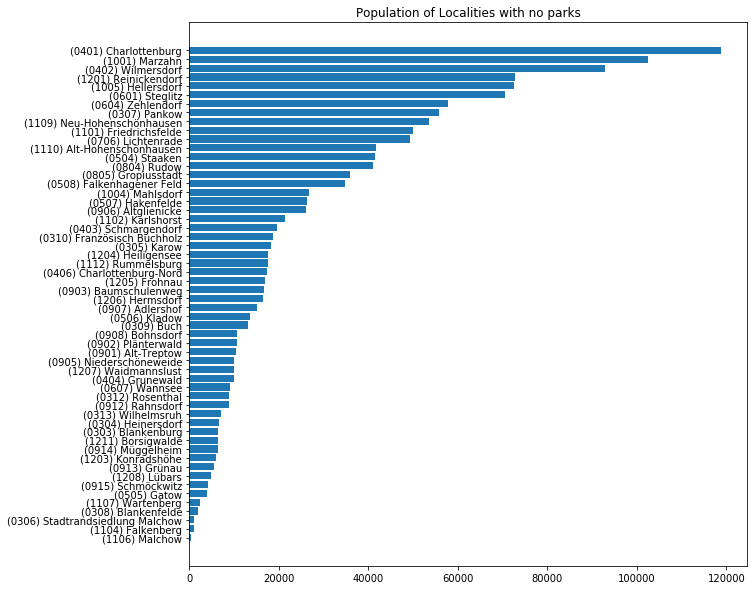

In [32]:
#plotting locaities with no parks and thier population 
plt.barh(df_no_parks['Locality'], df_no_parks['Population as of 2008'], align='center',data=df_no_parks)
plt.title('Population of Localities with no parks')
plt.savefig(r'C:\Users\GAURI TOSHNIWAL\Documents\Berlin_two.png')

In [33]:
df_merged = df_merged.astype({'Number of parks and playground':int})

In [34]:
df_merged.head()

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground,Population to park ratio
0,(0101) Mitte,10.70,79582,7445,52.517690,13.402376,4,1861.250000
1,(0102) Moabit,7.72,69425,8993,52.530102,13.342542,3,2997.666667
2,(0103) Hansaviertel,0.53,5889,11111,52.519123,13.341873,2,5555.500000
3,(0104) Tiergarten,5.17,12486,2415,52.514500,13.350100,5,483.000000
4,(0105) Wedding,9.23,76363,8273,52.550123,13.341970,1,8273.000000


In [35]:
#creating a copy of dataframe for further use
X = df_merged
df_final = df_merged.copy()

In [36]:
# considering two parameters for clustering 
# parameters are Area of Locality and Population having acess to park
del X['Locality']
del X['Population as of 2008']
del X['latitude']
del X['longitude']
del X['Density inhabitants per km²']
del X['Number of parks and playground']

X.head()

,Area in km²,Population to park ratio
0,10.70,1861.250000
1,7.72,2997.666667
2,0.53,5555.500000
3,5.17,483.000000
4,9.23,8273.000000


In [37]:
#Finding the right k value
#Finding Distance from centroids for different number of centroids
dist_point_from_cluster_center = []
K = range(1,10)
for no_of_cluster in K:
    k_model = KMeans(n_clusters = no_of_cluster)
    k_model.fit(X)
    dist_point_from_cluster_center.append(k_model.inertia_)

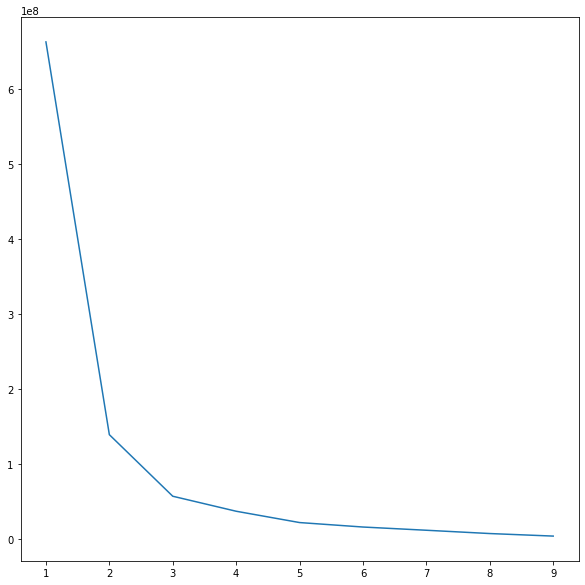

In [38]:
#Chceking the elbow point
plt.plot(K,dist_point_from_cluster_center)

#### We can see the elbow point at 3 so k =3 ####

In [39]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1])

In [40]:
# add clustering labels
df_final.insert(0, 'Cluster Labels', kmeans.labels_)

df_final.head()

,Cluster Labels,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground,Population to park ratio
0,0,(0101) Mitte,10.70,79582,7445,52.517690,13.402376,4,1861.250000
1,0,(0102) Moabit,7.72,69425,8993,52.530102,13.342542,3,2997.666667
2,2,(0103) Hansaviertel,0.53,5889,11111,52.519123,13.341873,2,5555.500000
3,0,(0104) Tiergarten,5.17,12486,2415,52.514500,13.350100,5,483.000000
4,2,(0105) Wedding,9.23,76363,8273,52.550123,13.341970,1,8273.000000


In [41]:
#finding coordinates of berlin city
address = 'Berlin'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address,timeout=10)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin City are 52.5170365, 13.3888599.


In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['latitude'],df_final['longitude'],df_final['Locality'],df_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

#### Examining Clusters ####

In [43]:
df_final.loc[df_final['Cluster Labels'] == 0]

,Cluster Labels,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground,Population to park ratio
0,0,(0101) Mitte,10.70,79582,7445,52.517690,13.402376,4,1861.250000
1,0,(0102) Moabit,7.72,69425,8993,52.530102,13.342542,3,2997.666667
3,0,(0104) Tiergarten,5.17,12486,2415,52.514500,13.350100,5,483.000000
8,0,(0301) Prenzlauer Berg,11.00,142319,12991,52.539847,13.428565,4,3247.750000
9,0,(0302) Weißensee,7.93,45485,5736,52.554619,13.463002,2,2868.000000
11,0,(0405) Westend,13.50,37883,2800,52.516200,13.260000,1,2800.000000
14,0,(0502) Haselhorst,4.73,13668,2891,52.541323,13.231156,1,2891.000000
15,0,(0503) Siemensstadt,5.66,11388,2012,52.539808,13.256893,1,2012.000000
16,0,(0509) Wilhelmstadt,10.40,37080,3558,52.513921,13.191452,1,3558.000000
17,0,(0602) Lichterfelde,18.20,78338,4300,52.437293,13.313864,2,2150.000000


#### The first cluster i.e. is cluster 0 consists of localities where number of parks according to the population are a fair number and these localities don't require any urgency in building more parks ####

In [44]:
df_final.loc[df_final['Cluster Labels'] == 1]

,Cluster Labels,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground,Population to park ratio
5,1,(0106) Gesundbrunnen,6.13,82729,13496,52.550920,13.384846,1,13496.0
12,1,(0407) Halensee,1.27,13966,10997,52.497226,13.292999,1,10997.0
22,1,(0702) Friedenau,1.65,26736,16204,52.472075,13.329642,1,16204.0
26,1,(0801) Neukölln,11.70,154127,13173,52.481150,13.435350,1,13173.0
36,1,(1111) Fennpfuhl,2.12,30932,14591,52.528785,13.473469,1,14591.0
39,1,(1210) Märkisches Viertel,3.20,35206,11002,52.599312,13.356532,1,11002.0


#### The second cluster i.e. cluster 1 are densly populated localities where number of parks needs to be increased but 4 out the 6 localities in this cluster have a small area ####

In [45]:
df_final.loc[df_final['Cluster Labels'] == 2]

,Cluster Labels,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,latitude,longitude,Number of parks and playground,Population to park ratio
2,2,(0103) Hansaviertel,0.53,5889,11111,52.519123,13.341873,2,5555.5
4,2,(0105) Wedding,9.23,76363,8273,52.550123,13.341970,1,8273.0
6,2,(0201) Friedrichshain,9.78,114050,11662,52.512215,13.450290,2,5831.0
7,2,(0202) Kreuzberg,10.40,147227,14184,52.486084,13.385951,2,7092.0
10,2,(0311) Niederschönhausen,6.49,26903,4145,52.585806,13.401397,1,4145.0
13,2,(0501) Spandau,8.03,33433,4164,52.535788,13.197792,1,4164.0
18,2,(0603) Lankwitz,6.99,40385,5778,52.433698,13.345486,1,5778.0
24,2,(0704) Mariendorf,9.38,48882,5211,52.440080,13.390028,1,5211.0
28,2,(0803) Buckow,6.35,38018,5987,52.567217,14.076153,1,5987.0
35,2,(1103) Lichtenberg,7.22,32295,4473,52.519672,13.495046,1,4473.0


#### The last cluster i.e. cluster 2 has localities where parks according to population is less, 10 localities fall in this cluster out of which one locality is very small area wise ####

### Conclusion ###

#### 1. Cluster 0 has a total 24 Localities and these can be categorized as very good localities on the basis of the number parks present for the residents in these localities ####
#### 2. Cluster 1 has a total 6 Localities and these can be categorized as average localities as parks are present in all of these but they are not sufficient for the residents ####
#### 3. Cluster 2 has a total 10 Localities and these can be categorizes as good localities on the basis of the number parks present for the residents in these localities ####
#### 4. These are 56 localities with No parks and out of these 5 localities have a population of more than 70,000 these need an urgent efforts in planning and building of parks ####